In [72]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
%matplotlib inline
import seaborn as sns

In [73]:
train_data = pd.read_csv(r"D:\kaggle\house prediction\data.csv")
test_data = pd.read_csv(r"D:\kaggle\house prediction\output.csv")

In [74]:
train_data.head(2)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [75]:
test_data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [76]:
train_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

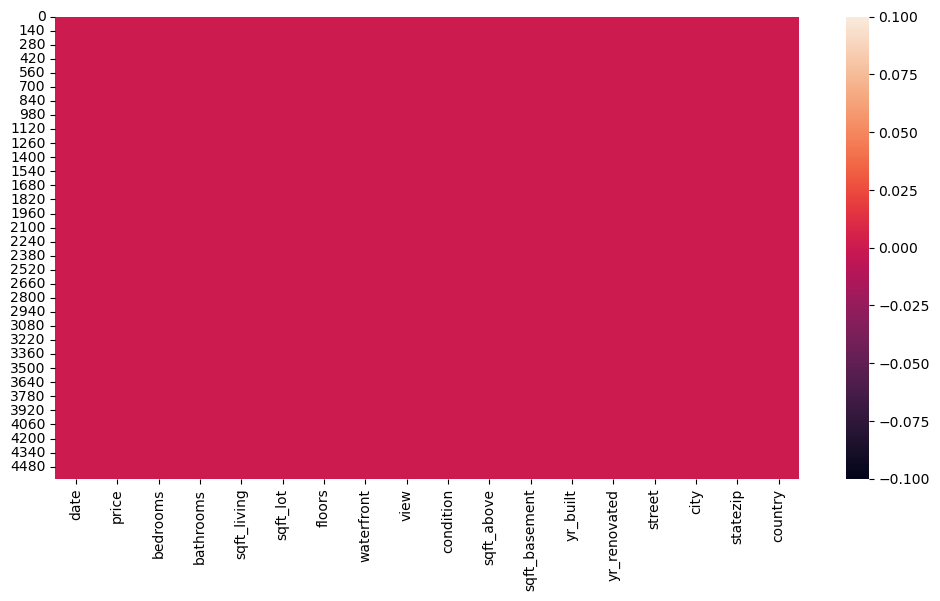

In [78]:
train_data.isnull().sum()
plt.figure(figsize=(12,6))
sns.heatmap(train_data.isnull())
plt.show()

In [79]:
print(train_data.shape)
print(train_data.columns)

(4600, 18)
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [80]:
# Select the features and target variable
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
            'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 
            'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']

In [81]:
X = train_data[features]
y = train_data['price']

In [82]:
# Encode categorical features
X = pd.get_dummies(X, columns=['street', 'city', 'statezip', 'country'], drop_first=True)

In [83]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

# Train the model (using Random Forest as an example)
lrh_model = LinearRegression()
lrh_model.fit(X_train, y_train)

LinearRegression()

In [85]:
# Prepare test data
X_test_data = test_data[features]
X_test_data = pd.get_dummies(X_test_data, columns=['street', 'city', 'statezip', 'country'], drop_first=True)

# Align the test data columns with the training data columns
X_test_data = X_test_data.reindex(columns=X.columns, fill_value=0)


In [86]:
y_test_pred = lr_model.predict(X_test)

In [87]:
# Predict prices for the test data
test_data['predicted_price'] = lrh_model.predict(X_test_data)

# Save the test DataFrame with predictions to a new CSV file
test_data.to_csv(r'D:\kaggle\house prediction\predicted_output.csv', index=False)

print(test_data[['date', 'predicted_price']].head())

                  date  predicted_price
0  2014-05-02 00:00:00     3.130000e+05
1  2014-05-02 00:00:00     2.384000e+06
2  2014-05-02 00:00:00     3.420000e+05
3  2014-05-02 00:00:00     4.200000e+05
4  2014-05-02 00:00:00     5.500000e+05


In [88]:
# Calculate metrics
test_mae = mean_absolute_error(test_data['price'], test_data['predicted_price'])
test_mse = mean_squared_error(test_data['price'], test_data['predicted_price'])
test_rmse = test_mse ** 0.5
test_r2 = r2_score(test_data['price'], test_data['predicted_price'])

# Print metrics
print(f"Linear Regression Model Test Accuracy:")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Mean Squared Error (MSE): {test_mse}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse}")
print(f"Test R-squared (R²): {test_r2}")



Linear Regression Model Test Accuracy:
Test Mean Absolute Error (MAE): 185224.30989911355
Test Mean Squared Error (MSE): 917033262931.9974
Test Root Mean Squared Error (RMSE): 957618.5372746277
Test R-squared (R²): -1.8851998892439612


In [89]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [97]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming ridge_model has been trained and X_test, y_test are defined
y_pred_ridge = ridge_model.predict(X_test)

# Calculate metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print metrics
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"R-squared (R²): {r2_ridge}")


Mean Squared Error (MSE): 964191119396.6912
Root Mean Squared Error (RMSE): 981932.3395207488
R-squared (R²): 0.05457216298439449
